In [76]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [39]:
BATCH_SIZE= 32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [40]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PLantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [41]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 1 1 2 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0]


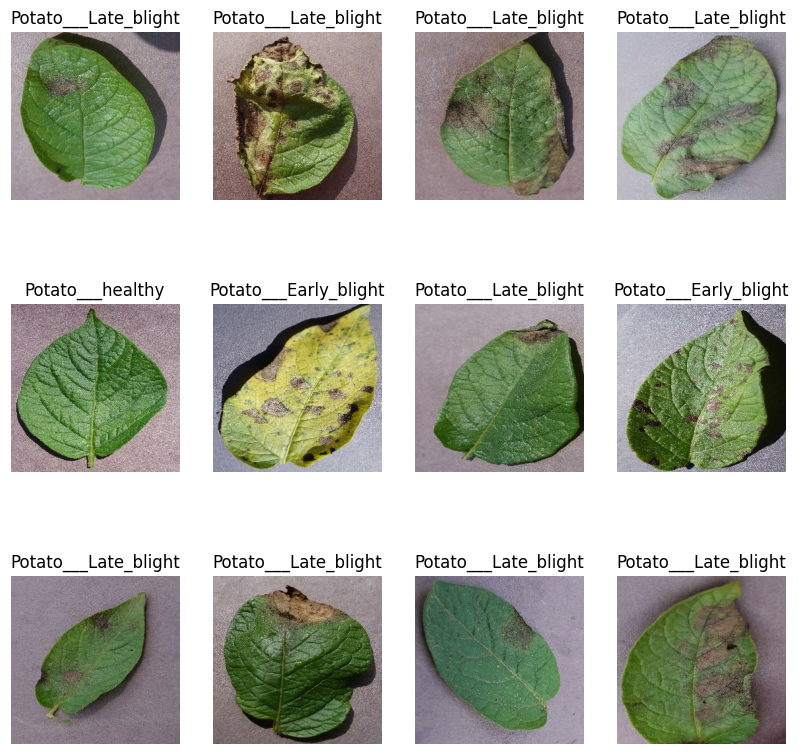

In [42]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [43]:
#80%--> training, 
#10%--> validation,
#10%--> test,

In [44]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [45]:
train_ds=dataset.take(54)
len(train_ds)

54

In [46]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [47]:
val_size=0.1
len(dataset)*val_size


6.800000000000001

In [48]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [49]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [50]:
def partition_data(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)==1

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds= ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, test_ds, val_ds

In [51]:
train_ds, test_ds, val_ds=partition_data(dataset)

In [52]:
len(train_ds)

54

In [53]:
len(val_ds)

6

In [54]:
len(test_ds)

8

In [55]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[127. 121. 123.]
  [136. 130. 132.]
  [145. 139. 141.]
  ...
  [157. 152. 158.]
  [157. 152. 158.]
  [157. 152. 158.]]

 [[118. 112. 114.]
  [127. 121. 123.]
  [138. 132. 134.]
  ...
  [154. 149. 155.]
  [155. 150. 156.]
  [155. 150. 156.]]

 [[117. 111. 113.]
  [125. 119. 121.]
  [135. 129. 131.]
  ...
  [158. 153. 159.]
  [159. 154. 160.]
  [159. 154. 160.]]

 ...

 [[131. 123. 121.]
  [142. 134. 132.]
  [139. 131. 129.]
  ...
  [150. 144. 148.]
  [144. 138. 142.]
  [157. 151. 155.]]

 [[127. 119. 117.]
  [137. 129. 127.]
  [134. 126. 124.]
  ...
  [152. 146. 150.]
  [156. 150. 154.]
  [161. 155. 159.]]

 [[133. 125. 123.]
  [127. 119. 117.]
  [124. 116. 114.]
  ...
  [151. 145. 149.]
  [158. 152. 156.]
  [151. 145. 149.]]]


In [57]:
tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [58]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [59]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3
resize_and_rescale = layers.Rescaling(1./255)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [61]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [62]:
history=model.fit(
    train_ds, 
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS

)

Epoch 1/50
54/54 [==============================] - 19s 286ms/step - loss: 0.9044 - accuracy: 0.5127 - val_loss: 0.8964 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 12s 225ms/step - loss: 0.6603 - accuracy: 0.7089 - val_loss: 0.4934 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 11s 211ms/step - loss: 0.4944 - accuracy: 0.7957 - val_loss: 0.5094 - val_accuracy: 0.7604
Epoch 4/50
54/54 [==============================] - 11s 211ms/step - loss: 0.3876 - accuracy: 0.8438 - val_loss: 0.4261 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 11s 211ms/step - loss: 0.3471 - accuracy: 0.8605 - val_loss: 0.3563 - val_accuracy: 0.8854
Epoch 6/50
54/54 [==============================] - 11s 212ms/step - loss: 0.3022 - accuracy: 0.8773 - val_loss: 0.4036 - val_accuracy: 0.8333
Epoch 7/50
54/54 [==============================] - 11s 211ms/step - loss: 0.2921 - accuracy: 0.8860 - val_loss: 0.4283 - val_accuracy: 0.8281

In [64]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 43ms/step - loss: 0.0069 - accuracy: 0.9961


In [65]:
scores

[0.0068649910390377045, 0.99609375]

In [70]:
history.history['accuracy']

[0.5127314925193787,
 0.7089120149612427,
 0.7957175970077515,
 0.84375,
 0.8605324029922485,
 0.8773148059844971,
 0.8859953880310059,
 0.9108796119689941,
 0.8993055820465088,
 0.9126157164573669,
 0.9259259104728699,
 0.9380787014961243,
 0.9444444179534912,
 0.9403935074806213,
 0.9525462985038757,
 0.9652777910232544,
 0.9519675970077515,
 0.96875,
 0.9716435074806213,
 0.9704861044883728,
 0.9716435074806213,
 0.9710648059844971,
 0.9739583134651184,
 0.9809027910232544,
 0.9866898059844971,
 0.9826388955116272,
 0.9820601940155029,
 0.9751157164573669,
 0.9855324029922485,
 0.9936342835426331,
 0.9872685074806213,
 0.9861111044883728,
 0.9704861044883728,
 0.9774305820465088,
 0.9878472089767456,
 0.9861111044883728,
 0.9907407164573669,
 0.9716435074806213,
 0.9884259104728699,
 0.9861111044883728,
 0.9895833134651184,
 0.9982638955116272,
 0.9872685074806213,
 0.9884259104728699,
 0.9837962985038757,
 0.9901620149612427,
 0.9976851940155029,
 0.9953703880310059,
 0.99594908952

In [71]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

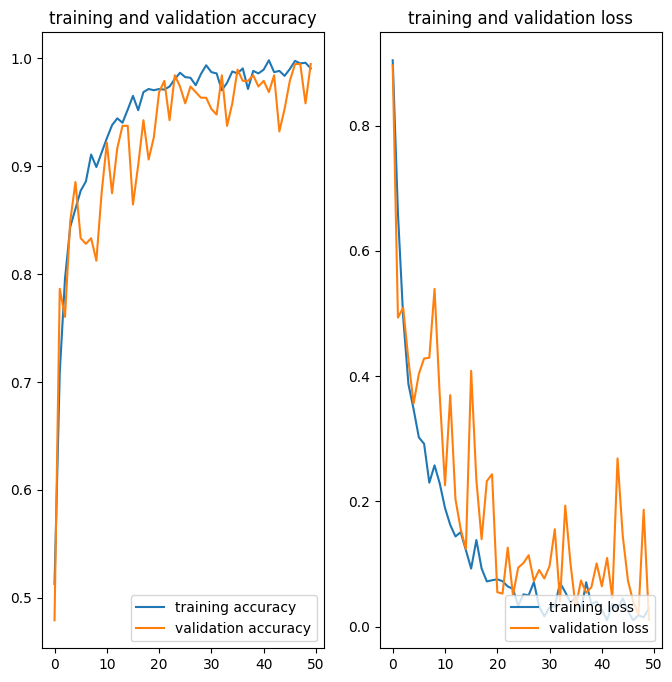

In [73]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='training loss')
plt.plot(range(EPOCHS), val_loss, label='validation loss')
plt.legend(loc='lower right')
plt.title('training and validation loss')
plt.show()



first image to predict:
Actual Label: Potato___Early_blight
1/1 [==============================] - 0s 59ms/step
Predicted Label Potato___Early_blight


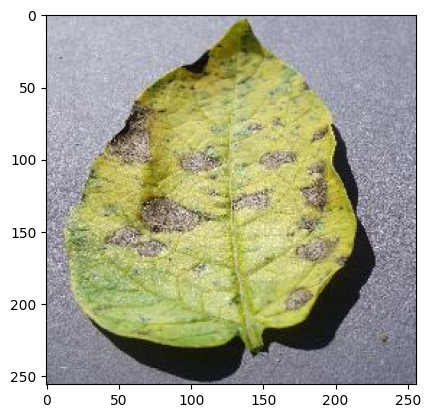

In [79]:
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    
    print('first image to predict:')
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction=model.predict(image_batch)
    print('Predicted Label', class_names[np.argmax(batch_prediction[0])])
    

In [84]:
def predict(model, img):
    img_array= tf.keras.preprocessing.image.img_to_array(img)
    img_array= tf.expand_dims(img_array, 0)

    predictions= model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 40ms/step


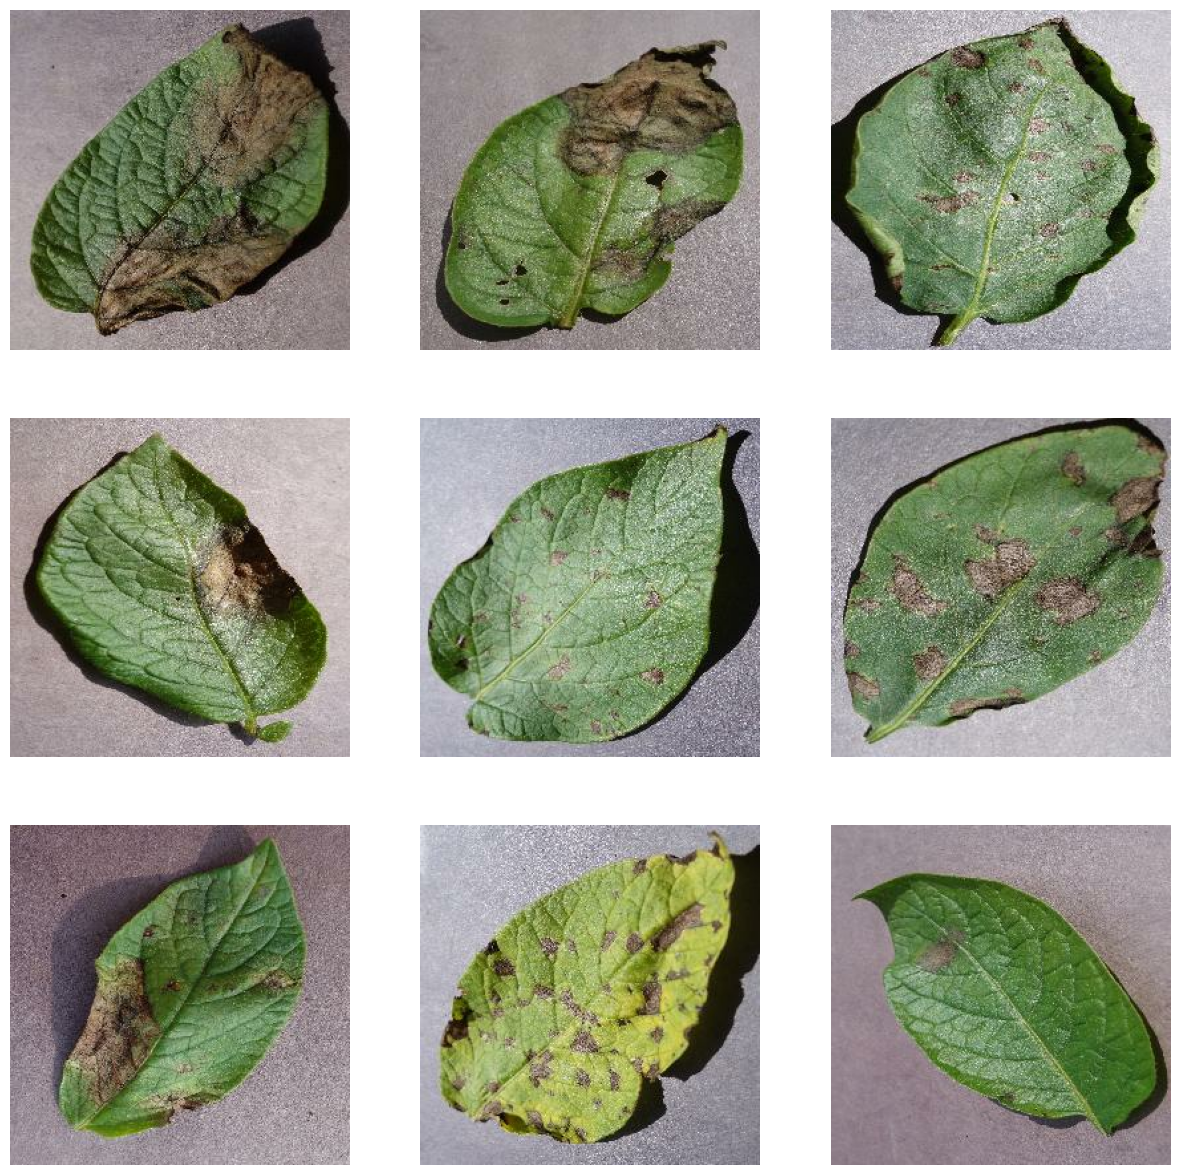

In [86]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence= predict(model, images[i].numpy())

        actual_class= class_names[labels[i]]
        plt.axis('off')



In [87]:
model_version=1
model.save(f"./models/")

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets
